<font color='#E14C14' size=7 align='center'><p style='text-align: center;'>**Análisis y Tratamiento de Datos en Química**

<font color='#E16814' size=8 align='center'><p style='text-align: center;'>**Actividad azul de timol**
<font color='#E17714' size=6><p style='text-align: center;'>**Yenny Fernanda Velandia Hernández-Cod. 2180095**
<font color='#E1BF14' size=6 align='center'><p style='text-align: center;'>**Docente: Enrique Mejía**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn import preprocessing
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
import scipy.io #scipy.io me permite leer datos construidos en matlab
from scipy import stats # importando scipy.stats
from scipy.signal import savgol_filter
import scipy as sio
%matplotlib inline

In [2]:
excel1 = pd.read_excel('./Datos/Datos-azul-timol.xlsx', nrows=19)

In [3]:
excel1

,Azul de timol (596 nm),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Espectro UV-Vis,Unnamed: 8
0,Muestra,Absorbancia,Muestra,Absorbancia,Muestra,Absorbancia,Concentración,Longitud de onda,Absorbancia
1,Blanco,0.002,Blanco,0.002,Blanco,0.002,0,400,0.126
2,Patrón 1,0.1,Patrón 1,0.09,Patrón 1,0.089,3.475e-06,400.5,0.125
3,Blanco,0,Blanco,0,Blanco,-0.001,NaN,401,0.122
4,Patrón 2,0.276,Patrón 2,0.267,Patrón 2,0.267,1.0425e-05,401.5,0.121
5,Blanco,-0.001,Blanco,-0.001,Blanco,-0.002,NaN,402,0.119
6,Patrón 3,0.484,Patrón 3,0.482,Patrón 3,0.483,1.7375e-05,402.5,0.117
7,Blanco,-0.001,Blanco,0.001,Blanco,0.001,NaN,403,0.115
8,Patrón 4,0.674,Patrón 4,0.66,Patrón 4,0.659,2.4325e-05,403.5,0.114
9,Blanco,0.001,Blanco,0.001,Blanco,0,NaN,404,0.112


In [4]:
excel = pd.read_excel('./Datos/Datos-azul-timol.xlsx')

In [5]:
#prueba = excel.drop(excel.index[797:801], inplace=True)
prueba = excel.iloc[:796]
prueba

,Azul de timol (596 nm),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Espectro UV-Vis,Unnamed: 8
0,Muestra,Absorbancia,Muestra,Absorbancia,Muestra,Absorbancia,Concentración,Longitud de onda,Absorbancia
1,Blanco,0.002,Blanco,0.002,Blanco,0.002,0,400,0.126
2,Patrón 1,0.1,Patrón 1,0.09,Patrón 1,0.089,3.475e-06,400.5,0.125
3,Blanco,0,Blanco,0,Blanco,-0.001,NaN,401,0.122
4,Patrón 2,0.276,Patrón 2,0.267,Patrón 2,0.267,1.0425e-05,401.5,0.121
...,...,...,...,...,...,...,...,...,...
791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,795,-0.003
792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,795.5,-0.003
793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,796,-0.003
794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,796.5,-0.004


In [6]:
excel.drop([0],axis=0)
excel.set_axis(['', 'Abs1', '', 'Abs2', '', 'Abs3', 'Molar', 'Lo', 'AbsUV'], axis=1, inplace=True)
excel.drop([''],axis=1, inplace=True)
excel.drop([0],axis=0,inplace=True)
excel

,Abs1,Abs2,Abs3,Molar,Lo,AbsUV
1,0.002,0.002,0.002,0,400,0.126
2,0.1,0.09,0.089,3.475e-06,400.5,0.125
3,0,0,-0.001,NaN,401,0.122
4,0.276,0.267,0.267,1.0425e-05,401.5,0.121
5,-0.001,-0.001,-0.002,NaN,402,0.119
...,...,...,...,...,...,...
797,NaN,NaN,NaN,NaN,798,-0.004
798,NaN,NaN,NaN,NaN,798.5,-0.004
799,NaN,NaN,NaN,NaN,799,-0.004
800,NaN,NaN,NaN,NaN,799.5,-0.004


df = df.dropna()
df

df['avg'] = excel [["Abs1", "Abs2","Abs3","avg abs"]].mean(axis=1)
df


In [7]:
df = pd.concat([excel[["Abs1"]],excel[["Abs2"]],excel[["Abs3"]]], axis=1, ignore_index=True)
df = df.dropna()
df.set_axis(['Abs1', 'Abs2', 'Abs3'], axis=1, inplace=True)
df['avg'] = excel[['Abs1', 'Abs2', 'Abs3']].mean(axis=1)

df1 = df.drop([2, 4 , 6, 8, 10, 12, 14, 16, 18], axis=0)
Abs = df1['avg'].mean()
print(Abs)

0.0007777777777777778


In [8]:
df

,Abs1,Abs2,Abs3,avg
1,0.002,0.002,0.002,0.002000
2,0.1,0.09,0.089,0.093000
3,0,0,-0.001,-0.000333
4,0.276,0.267,0.267,0.270000
5,-0.001,-0.001,-0.002,-0.001333
6,0.484,0.482,0.483,0.483000
7,-0.001,0.001,0.001,0.000333
8,0.674,0.66,0.659,0.664333
9,0.001,0.001,0,0.000667
10,0.877,0.877,0.877,0.877000


In [9]:
df = df.drop([1, 3, 5, 7, 9, 11, 13, 15, 17], axis=0)
df=df.append({'Abs1' : 0 , 'Abs2' : 0 , 'Abs3' : 0 , 'avg' : 0.0007778} , ignore_index=True);

In [10]:
avg = df.sort_values('avg', ignore_index=True)
avg = avg[["avg"]]
Abs = avg.dropna()
mM = excel[["Molar"]]
mM =mM.dropna()
mM["mM"] = mM["Molar"]/0.001
mM = mM.reset_index(drop=True)

In [11]:
df1 = pd.concat([Abs ,mM[["mM"]]], axis=1, ignore_index=True)
df1.set_axis(['Abs', '[mM]'], axis=1, inplace=True)
df1

,Abs,[mM]
0,0.000778,0
1,0.093000,0.003475
2,0.270000,0.010425
3,0.483000,0.017375
4,0.664333,0.024325
5,0.877000,0.031275
6,1.040667,0.038225
7,1.266667,0.045175
8,1.478000,0.052125
9,1.657333,0.059075


# Modelo líneal

In [12]:
import sklearn.metrics as skm
from sklearn import linear_model
x = df1 [['[mM]']] 
y = df1 [['Abs']]
reg = linear_model.LinearRegression()
reg.fit(x, y)
y_pred = reg.predict(x)
m = reg.coef_[0]
b = reg.intercept_[0]
mse = skm.mean_squared_error(y, y_pred)
r2 = skm.r2_score(y, y_pred)

In [13]:
x=np.array(x)
y=np.array(y)
y_pred=np.array(y_pred)

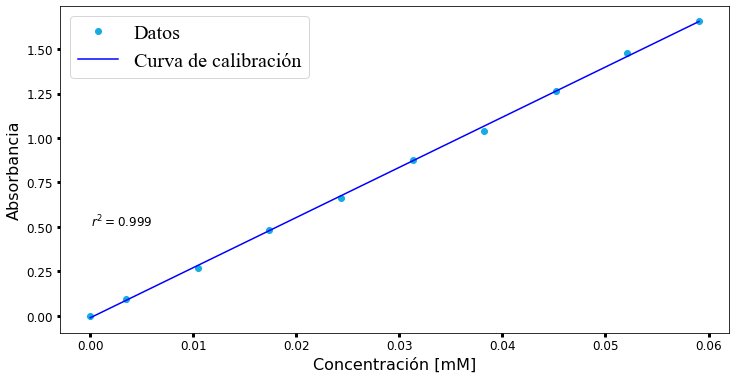

In [14]:
fig, ax = plt.subplots(figsize=(12,6))

plt.rcParams["font.family"] = 'Times New Roman'

plt.plot(df1['[mM]'],df1['Abs'], 'o', color='#14ACE1', label='Datos')
plt.plot(x,y_pred, 'b-', label='Curva de calibración')

ax.text(5e-5,0.50, r"$r^2 = "+str("{0:.3f}".format(r2))+r"$", fontsize=12, color="black")

ax.tick_params(axis='both', labelsize=12, width=3)
ax.set_xlabel('Concentración [mM]',  fontsize=16)
ax.set_ylabel('Absorbancia', fontsize=16)
plt.legend(loc='best', fontsize=20)
plt.show();

# MODELO

## Propiedad 1

In [15]:
ir = pd.read_excel("./Datos/ASCI_IR.xlsx", header=0)
ir =  ir.T
ir

,0,1,2,3,4,5,6,7,8,9,...,7458,7459,7460,7461,7462,7463,7464,7465,7466,7467
10,0.011097,0.011199,0.010985,0.010543,0.010022,0.009558,0.009238,0.009085,0.009071,0.009146,...,0.007546,0.007546,0.007545,0.007542,0.007537,0.007530,0.007522,0.007512,0.007503,0.007494
10.1,0.012468,0.012486,0.012449,0.012386,0.012352,0.012396,0.012543,0.012782,0.013081,0.013398,...,0.003964,0.003966,0.003967,0.003967,0.003967,0.003969,0.003970,0.003973,0.003975,0.003976
13,0.018689,0.018286,0.017887,0.017561,0.017360,0.017291,0.017324,0.017413,0.017528,0.017675,...,0.000043,0.000035,0.000026,0.000016,0.000008,0.000003,0.000000,0.000001,0.000006,0.000013
11,0.015869,0.015885,0.015737,0.015513,0.015276,0.015056,0.014842,0.014605,0.014319,0.013989,...,0.011477,0.011465,0.011455,0.011450,0.011447,0.011448,0.011453,0.011460,0.011469,0.011480
11.1,0.006940,0.006977,0.006766,0.006420,0.006081,0.005889,0.005934,0.006241,0.006779,0.007492,...,0.003165,0.003165,0.003163,0.003158,0.003152,0.003147,0.003144,0.003142,0.003143,0.003145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8.1,0.012003,0.012234,0.012054,0.011595,0.011025,0.010495,0.010095,0.009845,0.009712,0.009647,...,0.000554,0.000552,0.000548,0.000543,0.000539,0.000535,0.000533,0.000533,0.000534,0.000538
10.6,0.015255,0.014849,0.014527,0.014288,0.014117,0.013987,0.013858,0.013693,0.013464,0.013171,...,0.011690,0.011689,0.011688,0.011688,0.011689,0.011689,0.011687,0.011686,0.011684,0.011684
9.1,0.014519,0.015313,0.016455,0.017791,0.019159,0.020383,0.021306,0.021820,0.021896,0.021586,...,0.011802,0.011811,0.011820,0.011828,0.011834,0.011839,0.011844,0.011849,0.011856,0.011863
11.8,0.012098,0.013569,0.014856,0.015892,0.016641,0.017102,0.017313,0.017343,0.017274,0.017184,...,0.004172,0.004182,0.004192,0.004201,0.004207,0.004210,0.004211,0.004208,0.004203,0.004196


In [16]:
prp = pd.read_excel("./Datos/Informacion Crudos20.xlsx", header=1)
prp.set_axis(['', '', '', '', 'ASCI', 'IN(ASCI)', '', '', '', '', '', ''], axis=1, inplace=True)
prp.drop([''],axis=1, inplace=True)
prp.drop([2],axis=0,inplace=True)
prp = prp.reset_index(drop=True)
prp = prp.dropna()
prp_1 = prp[["ASCI"]]
prp_2 = prp[["IN(ASCI)"]]

In [17]:
prp

,ASCI,IN(ASCI)
0,9,55
1,9,55
2,10,50
3,10,50
4,13,35
...,...,...
77,9,55
78,8,60
79,10,50
80,11,45


In [18]:
ir = np.array(ir)
prp_1 = np.array(prp_1)
prp_2 = np.array(prp_2)

In [19]:
ir.shape, prp_1.shape, prp_2.shape

((82, 7468), (82, 1), (82, 1))

In [20]:
#normalizamos los datos
scaler=StandardScaler()
norma=Normalizer()

scaler.fit(ir) # calculo la media para poder hacer la transformacion
x_scaled=scaler.transform(ir)# Ahora si, escalo los datos y los normalizo
x_norm = preprocessing.normalize(ir, norm='l1')# Normaliza los datos
x_nsd = savgol_filter(x_norm, 17, polyorder=2, deriv=2) # Realiza segunda derivada de los datos

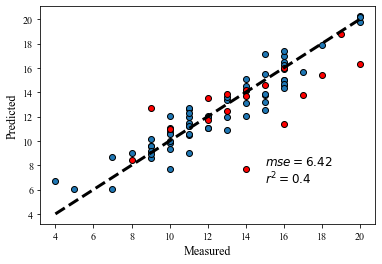

MSE = 6.42


In [21]:
# Separación de los datos en set de entrenamiento y set de prueba
x_train, x_test, y_train, y_test = train_test_split(x_norm, prp_1, train_size=0.8, random_state=37, shuffle= True)

pls = PLSRegression(n_components=10)
pls.fit(x_train, y_train)

y_pred = pls.predict(x_train)
y_pred_test = pls.predict(x_test)
fig, ax = plt.subplots()

ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.scatter(y_test, y_pred_test, color='red', edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.text(15,8, r"$mse = "+str(round(mean_squared_error(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.text(15,6.5, r"$r^2 = "+str(round(r2_score(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured', fontsize=12)
ax.set_ylabel('Predicted', fontsize=12)
plt.show()
print('MSE = ' + str(round(mean_squared_error(y_test, y_pred_test), 2)))

In [22]:
def optimise_pls(X, y, xt, n_comp):
    
    # Definimos PLS y el número de componentes
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y)
    y_pred1 = pls.predict(X)
    y_pred2 = pls.predict(xt)
    # Calculamos métricas
    r2 = r2_score(y, y_pred1)
    mse = mean_squared_error(y, y_pred1)
    rpd = y.std()/np.sqrt(mse)
    
    return (y_pred1, y_pred2, r2, mse, rpd)

In [23]:
# Probamos con 30 componentes
r2s = []
mses = []
rpds = []
yp1 = []
yp2 = []
arr_comp = np.arange(1, 31)
for n_comp in arr_comp:
    y_pred1, y_pred2, r2, mse, rpd = optimise_pls(x_train, y_train, x_test, n_comp)
    r2s.append(r2)
    mses.append(mse)
    rpds.append(rpd)
    yp1.append(y_pred1)
    yp2.append(y_pred2)

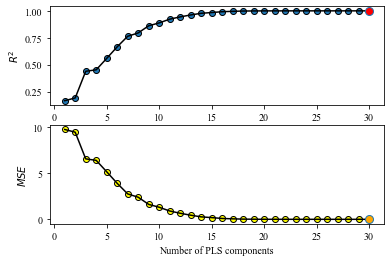

In [24]:
fig, (ax1, ax2) = plt.subplots(2, 1)
#fig, ax = plt.subplots()
ax1.scatter(arr_comp, r2s, edgecolors=(0, 0, 0))
ax1.plot(arr_comp, r2s, 'k-')
ax1.plot(arr_comp[np.argmax(r2s)], np.array(r2s)[np.argmax(r2s)], 'o', ms=8, mfc='red')
ax1.set_xlabel('Number of PLS components')
ax1.set_ylabel('$R^2$')

ax2.scatter(arr_comp, mses, color='yellow', edgecolors=(0, 0, 0))
ax2.plot(arr_comp, mses, 'k-')
ax2.plot(arr_comp[np.argmin(mses)], np.array(mses)[np.argmin(mses)], 'o', ms=8, mfc='orange')
ax2.set_xlabel('Number of PLS components')
ax2.set_ylabel('$MSE$')
plt.show()

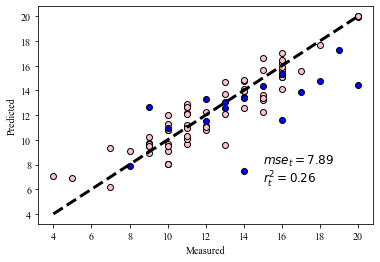

MSE = 1.61


In [25]:
fig, ax = plt.subplots()
ax.scatter(y_train, yp1[8], color='pink', edgecolors=(0, 0, 0))
ax.scatter(y_test, yp2[10], color='blue', edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.text(15,8, r"$mse_t = "+str(round(mean_squared_error(y_test, yp2[10]), 2))+r"$", fontsize=12, color="black")
ax.text(15,6.5, r"$r_t^2 = "+str(round(r2_score(y_test, yp2[10]), 2))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
print('MSE = ' + str(round(mean_squared_error(y_train, yp1[8]), 2)))

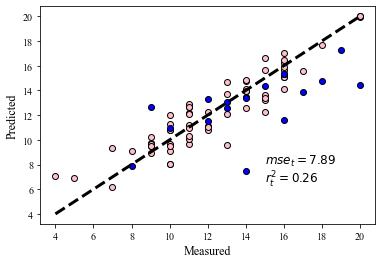

MSE = 1.61


In [26]:
fig, ax = plt.subplots()
ax.scatter(y_train, yp1[8], color='pink', edgecolors=(0, 0, 0))
ax.scatter(y_test, yp2[10], color='blue', edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.text(15,8, r"$mse_t = "+str(round(mean_squared_error(y_test, yp2[10]), 2))+r"$", fontsize=12, color="black")
ax.text(15,6.5, r"$r_t^2 = "+str(round(r2_score(y_test, yp2[10]), 2))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured', fontsize=12)
ax.set_ylabel('Predicted', fontsize=12)
plt.show()
print('MSE = ' + str(round(mean_squared_error(y_train, yp1[8]), 2)))

In [27]:
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
kf = KFold(n_splits=5, shuffle=True, random_state=42) # Vamos hacer 10 separaciones sin barajar en cada separación
model=PLSRegression(n_components=10) # Utilizamos 10 componentes de ajuste del modelo con PLS
x_traint = [] # Creamos arreglos de cada grupo de datos en los que almacenamos las diferentes divisiones 
x_testt = [] # Luego podremos utilizar la mejor separación para obtener el modelo más apropiado
y_traint = []
y_testt = []
r2s = []
mses = []

i = 1
for train_index, test_index in kf.split(x_norm):
    x_train = x_norm[train_index]
    x_test = x_norm[test_index]
    y_train = prp_1[train_index]
    y_test = prp_1[test_index]
    model.fit(x_train, y_train) #Training the model
    mse = mean_squared_error(y_test, model.predict(x_test))
    r2= r2_score(y_test, model.predict(x_test))
    
    # Almacenamos cada grupo en los arreglos creados
    x_traint.append(x_train) 
    x_testt.append(x_test)
    y_traint.append(y_train)
    y_testt.append(y_test)
    r2s.append(r2)
    mses.append(mse)
   
    # Entrenamos el modelo para cada separación the model
    model.fit(x_train, y_train) #Training the model
    print(f"MSE. {i} on the test set: {mean_squared_error(y_test, model.predict(x_test))}")
    print(f"R2. {i} on the test set: {r2_score(y_test, model.predict(x_test))}")
    i += 1

MSE. 1 on the test set: 6.095680820578869
R2. 1 on the test set: 0.48459574103355973
MSE. 2 on the test set: 12.558886753607183
R2. 2 on the test set: 0.1358289829065532
MSE. 3 on the test set: 11.54523745840682
R2. 3 on the test set: 0.07609228216563113
MSE. 4 on the test set: 4.336028430942974
R2. 4 on the test set: 0.4621980240690885
MSE. 5 on the test set: 7.4422602691699185
R2. 5 on the test set: -0.2943061337686814


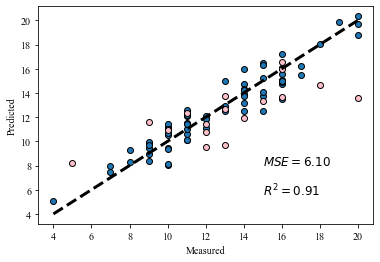

In [28]:
y_tr=np.array(y_traint[r2s.index(max(r2s))]) # Escogemos el mejor set a partir del que presente el
y_te=np.array(y_testt[r2s.index(max(r2s))]) # el valor máximo de r2. Podríamos también elegir el que
X_tr=np.array(x_traint[r2s.index(max(r2s))]) # presente el menor valor del mse
X_te=np.array(x_testt[r2s.index(max(r2s))])
model.fit(X_tr, y_tr) # Ejecutamos el modelo PLS con el set de entranamiento de mejor comportamiento

Y_pred = model.predict(X_tr) # Con el modelo predicmos los valos de la propiedad
Y_pred_test = model.predict(X_te) # Evaluamos las muestras de prueba

fig, ax = plt.subplots()
ax.scatter(y_tr, Y_pred, edgecolors=(0, 0, 0))
ax.scatter(y_te, Y_pred_test, color='pink', label='test set', edgecolors=(0, 0, 0))
ax.plot([y_tr.min(), y_tr.max()], [y_tr.min(), y_tr.max()], 'k--', lw=3)
ax.text(15,8, r"$MSE = "+str("{0:.2f}".format(mean_squared_error(y_te, Y_pred_test)))+r"$", fontsize=12, color="black")
ax.text(15,5.5, r"$R^2 = "+str("{0:.2f}".format(r2_score(y_tr, Y_pred)))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted', )
plt.show()

## Prueba 2- propiedad 2

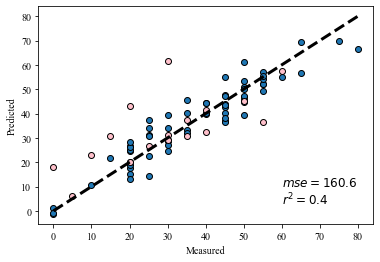

MSE = 160.6


In [29]:
# Separación de los datos en set de entrenamiento y set de prueba

x_train, x_test, y_train, y_test = train_test_split(x_norm, prp_2, train_size=0.8, random_state=37, shuffle= True)

pls = PLSRegression(n_components=10)
pls.fit(x_train, y_train)

y_pred = pls.predict(x_train)
y_pred_test = pls.predict(x_test)
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.scatter(y_test, y_pred_test, color='pink', edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.text(60,10, r"$mse = "+str(round(mean_squared_error(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.text(60,2.5, r"$r^2 = "+str(round(r2_score(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
print('MSE = ' + str(round(mean_squared_error(y_test, y_pred_test), 2)))

In [30]:
def optimise_pls(X, y, xt, n_comp):
    
    # Definimos PLS y el número de componentes
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y)
    y_pred1 = pls.predict(X)
    y_pred2 = pls.predict(xt)
    # Calculamos métricas
    r2 = r2_score(y, y_pred1)
    mse = mean_squared_error(y, y_pred1)
    rpd = y.std()/np.sqrt(mse)
    
    return (y_pred1, y_pred2, r2, mse, rpd)

In [31]:
# Probamos con 30 componentes
r2s = []
mses = []
rpds = []
yp1 = []
yp2 = []
arr_comp = np.arange(1, 31)
for n_comp in arr_comp:
    y_pred1, y_pred2, r2, mse, rpd = optimise_pls(x_train, y_train, x_test, n_comp)
    r2s.append(r2)
    mses.append(mse)
    rpds.append(rpd)
    yp1.append(y_pred1)
    yp2.append(y_pred2)

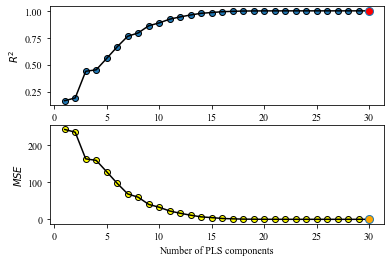

In [32]:
fig, (ax1, ax2) = plt.subplots(2, 1)
#fig, ax = plt.subplots()
ax1.scatter(arr_comp, r2s, edgecolors=(0, 0, 0))
ax1.plot(arr_comp, r2s, 'k-')
ax1.plot(arr_comp[np.argmax(r2s)], np.array(r2s)[np.argmax(r2s)], 'o', ms=8, mfc='red')
ax1.set_xlabel('Number of PLS components')
ax1.set_ylabel('$R^2$')

ax2.scatter(arr_comp, mses, color='yellow', edgecolors=(0, 0, 0))
ax2.plot(arr_comp, mses, 'k-')
ax2.plot(arr_comp[np.argmin(mses)], np.array(mses)[np.argmin(mses)], 'o', ms=8, mfc='orange')
ax2.set_xlabel('Number of PLS components')
ax2.set_ylabel('$MSE$')
plt.show()

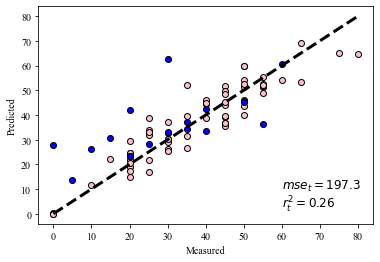

MSE = 40.35


In [33]:
fig, ax = plt.subplots()
ax.scatter(y_train, yp1[8], color='pink', edgecolors=(0, 0, 0))
ax.scatter(y_test, yp2[10], color='blue', edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.text(60,10, r"$mse_t = "+str(round(mean_squared_error(y_test, yp2[10]), 2))+r"$", fontsize=12, color="black")
ax.text(60,2.5, r"$r_t^2 = "+str(round(r2_score(y_test, yp2[10]), 2))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
print('MSE = ' + str(round(mean_squared_error(y_train, yp1[8]), 2)))

In [34]:
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
kf = KFold(n_splits=5, shuffle=True, random_state=42) # Vamos hacer 10 separaciones sin barajar en cada separación
model=PLSRegression(n_components=10) # Utilizamos 10 componentes de ajuste del modelo con PLS
x_traint = [] # Creamos arreglos de cada grupo de datos en los que almacenamos las diferentes divisiones 
x_testt = [] # Luego podremos utilizar la mejor separación para obtener el modelo más apropiado
y_traint = []
y_testt = []
r2s = []
mses = []

i = 1
for train_index, test_index in kf.split(x_norm):
    x_train = x_norm[train_index]
    x_test = x_norm[test_index]
    y_train = prp_2[train_index]
    y_test = prp_2[test_index]
    model.fit(x_train, y_train) #Training the model
    mse = mean_squared_error(y_test, model.predict(x_test))
    r2= r2_score(y_test, model.predict(x_test))
    
    # Almacenamos cada grupo en los arreglos creados
    x_traint.append(x_train) 
    x_testt.append(x_test)
    y_traint.append(y_train)
    y_testt.append(y_test)
    r2s.append(r2)
    mses.append(mse)
   
    # Entrenamos el modelo para cada separación the model
    model.fit(x_train, y_train) #Training the model
    print(f"MSE. {i} on the test set: {mean_squared_error(y_test, model.predict(x_test))}")
    print(f"R2. {i} on the test set: {r2_score(y_test, model.predict(x_test))}")
    i += 1

MSE. 1 on the test set: 152.39202051447162
R2. 1 on the test set: 0.48459574103355996
MSE. 2 on the test set: 313.97216884017763
R2. 2 on the test set: 0.13582898290655887
MSE. 3 on the test set: 288.6309364601715
R2. 3 on the test set: 0.07609228216562802
MSE. 4 on the test set: 108.4007107735749
R2. 4 on the test set: 0.4621980240690857
MSE. 5 on the test set: 186.05650672924577
R2. 5 on the test set: -0.2943061337686663


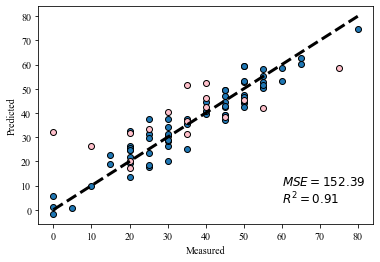

In [35]:
y_tr=np.array(y_traint[r2s.index(max(r2s))]) # Escogemos el mejor set a partir del que presente el
y_te=np.array(y_testt[r2s.index(max(r2s))]) # el valor máximo de r2. Podríamos también elegir el que
X_tr=np.array(x_traint[r2s.index(max(r2s))]) # presente el menor valor del mse
X_te=np.array(x_testt[r2s.index(max(r2s))])
model.fit(X_tr, y_tr) # Ejecutamos el modelo PLS con el set de entranamiento de mejor comportamiento

Y_pred = model.predict(X_tr) # Con el modelo predicmos los valos de la propiedad
Y_pred_test = model.predict(X_te) # Evaluamos las muestras de prueba

fig, ax = plt.subplots()
ax.scatter(y_tr, Y_pred, edgecolors=(0, 0, 0))
ax.scatter(y_te, Y_pred_test, color='pink', label='test set', edgecolors=(0, 0, 0))
ax.plot([y_tr.min(), y_tr.max()], [y_tr.min(), y_tr.max()], 'k--', lw=3)
ax.text(60,10, r"$MSE = "+str("{0:.2f}".format(mean_squared_error(y_te, Y_pred_test)))+r"$", fontsize=12, color="black")
ax.text(60,2.5, r"$R^2 = "+str("{0:.2f}".format(r2_score(y_tr, Y_pred)))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()